1 - Postive
0 - Neutral
-1 - Negative

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import string
import nltk
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [84]:
df = pd.read_csv('Twitter_Data.csv')

In [85]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [87]:
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [88]:
df = df.dropna(axis=0)

In [89]:
df.isnull().sum()

clean_text    0
category      0
dtype: int64

In [90]:
#removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern,input_txt)
    for char in r:
        input_txt = re.sub(char, "", input_txt)
    return input_txt

In [91]:
# Remove twitter handles (@user kind of thing)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['clean_text'],'@[\w]*')

In [92]:
# Remove special characters, numbers & Punctuations
#another method for replacing
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]"," ")

In [93]:
df.head()

,clean_text,category,clean_tweet
0,when modi promised “minimum government maximum...,-1.0,when modi promised minimum government maximum...
1,talk all the nonsense and continue all the dra...,0.0,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...,1.0,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...,1.0,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...,1.0,answer who among these the most powerful world...


In [94]:
# Remove shortwords
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3])) 
# Join basically adds words back into a sentence. Remember this function. Important

In [95]:
df['clean_tweet'].apply(lambda x:x.split())

0         [when, modi, promised, minimum, government, ma...
1         [talk, nonsense, continue, drama, will, vote, ...
2         [what, just, vote, modi, welcome, told, rahul,...
3         [asking, supporters, prefix, chowkidar, their,...
4         [answer, among, these, most, powerful, world, ...
                                ...                        
162975    [these, crores, paid, neerav, modi, recovered,...
162976    [dear, terrorist, payal, gawar, what, about, m...
162977             [cover, interaction, forum, where, left]
162978    [there, project, came, into, india, modi, drea...
162979    [have, ever, listen, about, like, gurukul, whe...
Name: clean_tweet, Length: 162969, dtype: object

In [96]:
df.head()

,clean_text,category,clean_tweet
0,when modi promised “minimum government maximum...,-1.0,when modi promised minimum government maximum ...
1,talk all the nonsense and continue all the dra...,0.0,talk nonsense continue drama will vote modi
2,what did just say vote for modi welcome bjp t...,1.0,what just vote modi welcome told rahul main ca...
3,asking his supporters prefix chowkidar their n...,1.0,asking supporters prefix chowkidar their names...
4,answer who among these the most powerful world...,1.0,answer among these most powerful world leader ...


In [97]:
# Tokennizing the tweets. Individual words is considered as tokens
tokenzied_tweet = df['clean_tweet'].apply(lambda x:x.split())

In [98]:
tokenzied_tweet.head()

0    [when, modi, promised, minimum, government, ma...
1    [talk, nonsense, continue, drama, will, vote, ...
2    [what, just, vote, modi, welcome, told, rahul,...
3    [asking, supporters, prefix, chowkidar, their,...
4    [answer, among, these, most, powerful, world, ...
Name: clean_tweet, dtype: object

In [99]:
# Removing all those extra useless characters in the end
from nltk.stem.porter import PorterStemmer 
stemmer = PorterStemmer()
tokenzied_tweet = tokenzied_tweet.apply(lambda sentence : [stemmer.stem(word) for word in sentence])
tokenzied_tweet.head()

0    [when, modi, promis, minimum, govern, maximum,...
1    [talk, nonsens, continu, drama, will, vote, modi]
2    [what, just, vote, modi, welcom, told, rahul, ...
3    [ask, support, prefix, chowkidar, their, name,...
4    [answer, among, these, most, power, world, lea...
Name: clean_tweet, dtype: object

In [100]:
# Combining words into a single string
for i in range(0,len(tokenzied_tweet)):
    for j in i:
        i = " ".join(j)

df['clean_tweet'] = tokenzied_tweet
df.head()

TypeError: 'int' object is not iterable

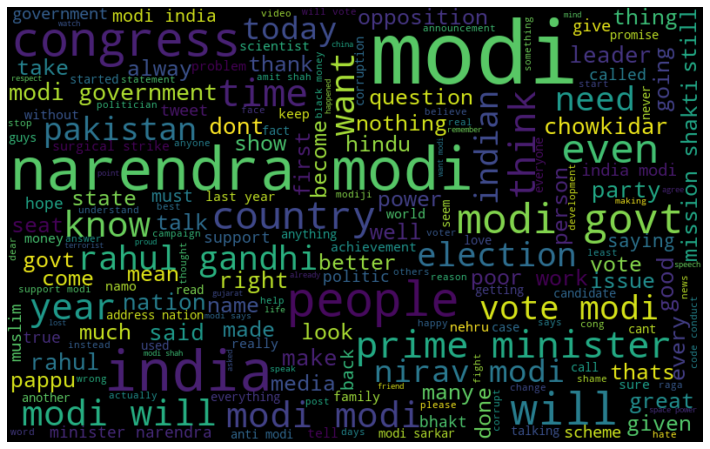

In [109]:
#Visualize frequent words
#More frequent words are bigger
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud=WordCloud(width = 800, height =500, random_state = 42, max_font_size = 100).generate(all_words)
# Plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

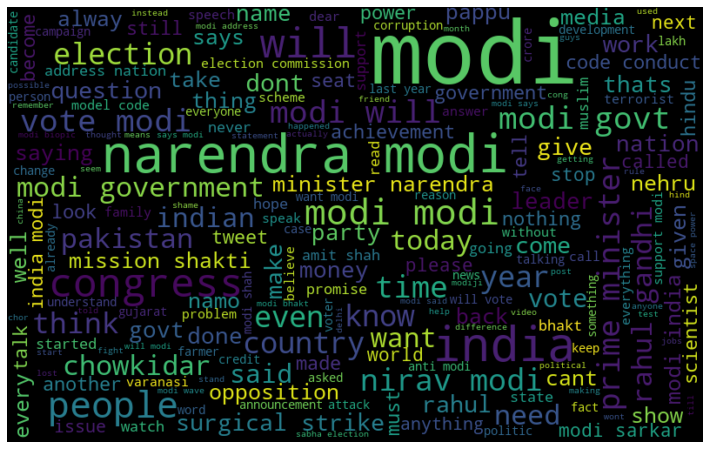

In [111]:
#frequent words for +ve and -ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['category']==0]])

from wordcloud import WordCloud
wordcloud=WordCloud(width = 800, height =500, random_state = 42, max_font_size = 100).generate(all_words)
# Plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

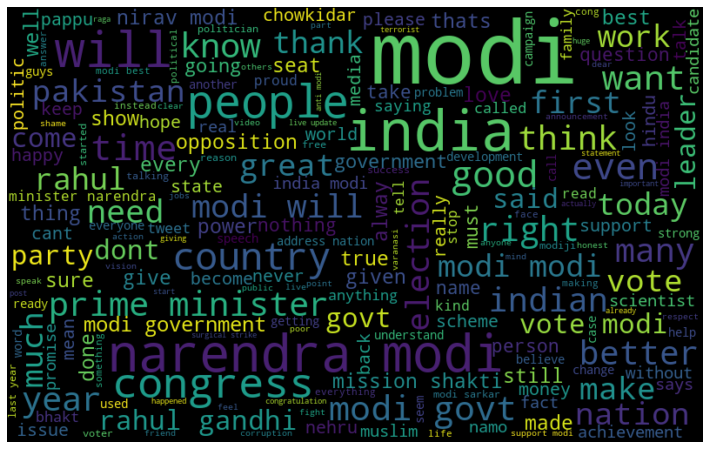

In [112]:
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['category']==1]])

from wordcloud import WordCloud
wordcloud=WordCloud(width = 800, height =500, random_state = 42, max_font_size = 100).generate(all_words)
# Plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

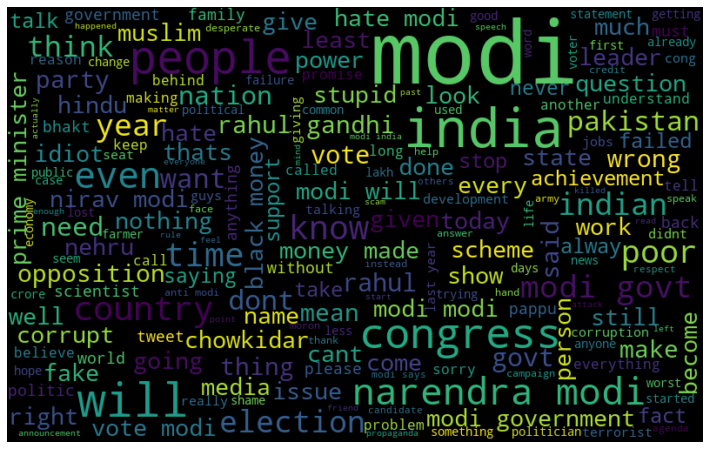

In [113]:
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['category']==-1]])

from wordcloud import WordCloud
wordcloud=WordCloud(width = 800, height =500, random_state = 42, max_font_size = 100).generate(all_words)
# Plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [116]:
def hastag_extract(tweet):
    hastags = []
    #loop words in the tweet
    for word in tweet:
        ht = re.findall(r"#(\w+)",word)
        hastags.append(ht)
    return hastags

In [117]:
# Extracting hastags for positive and negative tweets
ht_neutral = hastag_extract(df['clean_tweet'][df['category']==0])
ht_positive = hastag_extract(df['clean_tweet'][df['category']==1])
ht_negative = hastag_extract(df['clean_tweet'][df['category']==-1])

If there were actual hastag tweets we could have used it display countplot

In [123]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df =0.90, min_df =2,max_features = 1000, stop_words = 'english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [124]:
bow

<162969x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 1129011 stored elements in Compressed Sparse Row format>

In [127]:
bow.toarray() # 2D - Array with all the words expressed by 1,the number of times they occur

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [128]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split (bow,df['category'],random_state= 42, test_size=0.25)

In [129]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [131]:
lr.fit(x_train,y_train)

LogisticRegression()

In [132]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
y_pred = lr.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.736126451169526


In [133]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

        -1.0       0.55      0.77      0.64      6315
         0.0       0.92      0.65      0.76     19586
         1.0       0.69      0.83      0.75     14842

    accuracy                           0.74     40743
   macro avg       0.72      0.75      0.72     40743
weighted avg       0.78      0.74      0.74     40743

